In [43]:
import openpyxl
from pathlib import Path
import pandas as pd
from pandas import *
import cv2
from csv import reader
import os
import cv2
from PIL import Image

import IPython.display as display

In [44]:
class video:
    def __init__(self,videoname):
        self.videoname = videoname
    
    
    def video_upload(self):
        vidcap = cv2.VideoCapture(self.videoname)
        success,image = vidcap.read()
        count = 0
        while(success):
          cv2.imwrite("frame%d.jpg" % count, image)     # save frame as JPEG file      
          success,image = vidcap.read()
          #print('Read a new frame: ', image)
          count += 1
        return count
    

        

In [45]:
vedio1=video('vedio-fyp3.mp4')
count=vedio1.video_upload()

In [49]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [50]:
import numpy as np

In [103]:
 def Convert(string):
        string=string.replace("]", "")
        string=string.replace("[", "")
        li = list(string.split(","))
        return li

In [104]:
class frame:
    def __init__(self,count):
        self.count = count
    def find_accuracy(self,filepath):
       
  
        # get image
        img = Image.open(filepath)

        # get width and height
        width,height = img.size

        # display width and height
        print("The height of the image is: ", height)
        print("The width of the image is: ", width)
        img = Image.new("RGB", (height, width), (0, 0, 0))
        img.save("image.png", "PNG")
        display.display(Image.open("image.png"))
        img = matplotlib.image.imread('image.png')
        figure, ax = plt.subplots(1)
        rect = mpatches.Rectangle((12,990),40,700, edgecolor='g', facecolor="white")
        ax.add_patch(rect)
        ax.imshow(img)
        plt.savefig('my_plot1.png')
        img = matplotlib.image.imread('image.png')
        figure, ax = plt.subplots(1)
        rect = mpatches.Rectangle((12,60),40,700, edgecolor='g', facecolor="white")
        ax.add_patch(rect)
        ax.imshow(img)
        plt.savefig('my_plot2.png')
        img1 = cv2.imread('my_plot1.png')
        img2 = cv2.imread('my_plot2.png')

        # Applying OpenCV addition on images
        fimg = cv2.add(img1, img2)

        # Saving the output image
        cv2.imwrite('output.png', fimg)
        #compare manually labbeled image with the onewhich algorithm predicts
        img = cv2.imread('my_plot1.png', cv2.IMREAD_GRAYSCALE)
        n_white_pix1 = np.sum(img == 255)
        print('Number of white pixels:', n_white_pix1)
        
        img = cv2.imread('my_plot2.png', cv2.IMREAD_GRAYSCALE)
        n_white_pix2 = np.sum(img == 255)
        print('Number of white pixels:', n_white_pix2)

        n_accuracy=(n_white_pix1/n_white_pix2)
        print('accuracy manually labbeled image with the onewhich algorithm predicts:', n_accuracy)
        
        img = cv2.imread('output.png', cv2.IMREAD_GRAYSCALE)
        #compare manually labbeled image with the output
        n_white_pix3= np.sum(img == 255)
        print('Number of white pixels:',n_white_pix3)
        n_accuracy1=(n_white_pix1/n_white_pix3)
        print('accuracy manually labbeled image with the result:', n_accuracy1)


    def read_excel(self,name):
        file='\\file_name.csv'
        df = pd.read_excel(name, sheet_name='Sheet1')
        current_working_directory = os.getcwd()
        save_path = current_working_directory +file
        df.to_csv(save_path)
        file = file.replace('\\', "")
        #file= file.replace('/', "")
        return file
        
    def read_csvfile(self,file):
        list1=[]
        with open(file, 'r') as read_obj:
            # pass the file object to reader() to get the reader object
            csv_reader = reader(read_obj)
            # Iterate over each row in the csv using reader object
            for row in csv_reader:
                # row variable is a list that represents a row in csv
              #  print(row)
                list1.append(row)
        return list1
        
    def remove_nullvalues(self,list1):
        a=0
        b=0
        anotherlist=[]
        for i in list1:
            listt=[]
            b=0

            for j in i:

                if j!= '[]':
                    #list1[a]=list1[a].remove("[]")
                    listt.append(j)
                    #print(j)
                b=b+1
            anotherlist.append(listt)

            a=a+1
        anotherlist.pop(0)
        return anotherlist
   
    def remove_unwanted_characters(self,liist):
        b=0
        le=0
        liist=[]
        for i in listt:
            y=[]
            a=len(listt[b])
            le=0
            while(le<a):
                stri=listt[b][le]
                h=Convert(stri)
                y.append(h)
                le=le+1
            liist.append(y)

            b=b+1
        return liist
    def eleminate_firsttwocols(self,anotherlist):
        a=2
        listt=[]
        for i in anotherlist:
            li=[]
            b=len(i)
            a=2
           # li.append(i[0])
            while b>2 and a<b:
                print(i[a]) 
                li.append(i[a])
                a=a+1
            listt.append(li)
        return listt

    def Covert_to_int(self,liist):
        inttt=[]
        it=0
        for i in liist:
            flo=[]
            for j in i:
                lii=[]
                for k in j:
                    #print(k)
                    Float = float(k)
                    num = int(Float)   
                    lii.append(num)
                flo.append(lii)

            inttt.append(flo)
            it=it+1
        return inttt
    def displaycv2(self,rannge,inttt):
        count=0
        for i in range(rannge):
            #img = matplotlib.image.imread("frame%d.jpg" % count)
            img = cv2.imread("frame%d.jpg" % count)
            for j in range(len(inttt[i])):
                firstval=inttt[i][j][0]
                secondval=inttt[i][j][1]
                thirdval=inttt[i][j][2]
                fourthval=inttt[i][j][3]
                cv2.rectangle(img,  (firstval, secondval+fourthval), (firstval+thirdval,secondval), (225, 255, 255), 1)
                cv2.imshow('image', img)
                cv2.imwrite("bounding_boxes%d.jpg" % count, img)
                # Maintain output window utilla
                # user presses a key
                cv2.waitKey(0)


                # Destroying present windows on screen
                cv2.destroyAllWindows()
                j+=1
            i+=1
            count+=1

    




In [105]:
frame1=frame(count)

The height of the image is:  720
The width of the image is:  1280


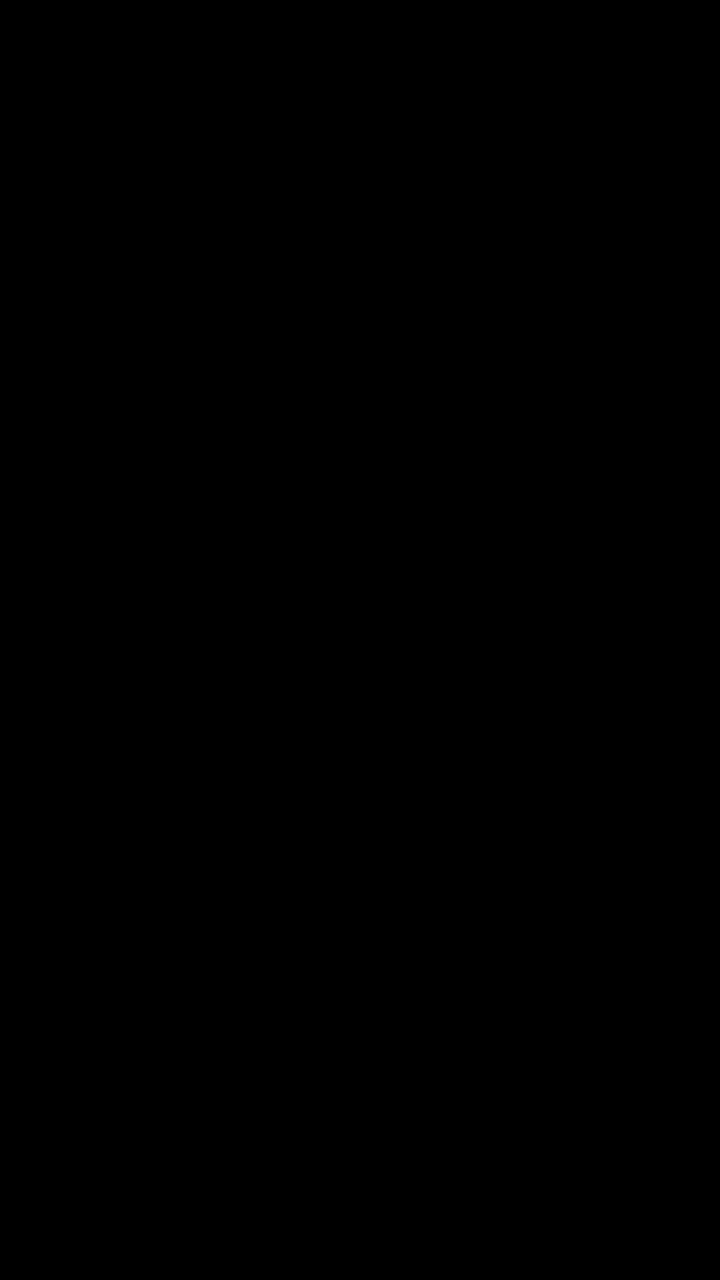

Number of white pixels: 96629
Number of white pixels: 97049
accuracy manually labbeled image with the onewhich algorithm predicts: 0.9956722892559429
Number of white pixels: 97337
accuracy manually labbeled image with the result: 0.9927263014064539


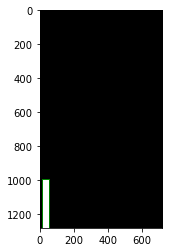

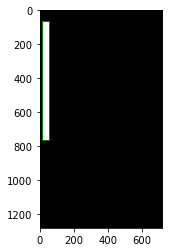

In [106]:
frame1.find_accuracy('frame0.jpg')

In [107]:
file=frame1.read_excel('video3.xlsx')

In [108]:
list1=frame1.read_csvfile(file)

In [109]:
print(list1)

[['', 'time', 'label1', 'label2', 'label3', 'label4', 'label5'], ['0', "0.08 sec'", '[66,666,117,31]', '[]', '[]', '[]', '[]'], ['1', "0.12 sec'", '[66,666,117,31]', '[]', '[]', '[]', '[]'], ['2', "0.16 sec'", '[66,666,117,31]', '[]', '[]', '[]', '[]'], ['3', "0.2 sec'", '[67,666,117,31]', '[]', '[]', '[]', '[]'], ['4', "0.24 sec'", '[66,666,117,31]', '[]', '[]', '[]', '[]'], ['5', "0.28 sec'", '[66,666,117,31]', '[]', '[]', '[]', '[]'], ['6', "0.32 sec'", '[66,666,117,31]', '[]', '[]', '[]', '[]'], ['7', "0.36 sec'", '[66,666,117,31]', '[]', '[]', '[]', '[]'], ['8', "0.4 sec'", '[67,666,117,31]', '[]', '[]', '[]', '[]'], ['9', "0.44 sec'", '[66.9998016357422,665.999694824219,117.000274658203,31.0002441406250]', '[]', '[]', '[]', '[]'], ['10', "0.48 sec'", '[66.9995498657227,665.997863769531,117.001014709473,31.0019531250000]', '[]', '[]', '[]', '[]'], ['11', "0.52 sec'", '[66.9997940063477,665.997619628906,117.000846862793,31.0025024414063]', '[]', '[]', '[]', '[]'], ['12', "0.56 sec'

In [110]:
anotherlist=frame1.remove_nullvalues(list1)

In [111]:
anotherlist

[['0', "0.08 sec'", '[66,666,117,31]'],
 ['1', "0.12 sec'", '[66,666,117,31]'],
 ['2', "0.16 sec'", '[66,666,117,31]'],
 ['3', "0.2 sec'", '[67,666,117,31]'],
 ['4', "0.24 sec'", '[66,666,117,31]'],
 ['5', "0.28 sec'", '[66,666,117,31]'],
 ['6', "0.32 sec'", '[66,666,117,31]'],
 ['7', "0.36 sec'", '[66,666,117,31]'],
 ['8', "0.4 sec'", '[67,666,117,31]'],
 ['9',
  "0.44 sec'",
  '[66.9998016357422,665.999694824219,117.000274658203,31.0002441406250]'],
 ['10',
  "0.48 sec'",
  '[66.9995498657227,665.997863769531,117.001014709473,31.0019531250000]'],
 ['11',
  "0.52 sec'",
  '[66.9997940063477,665.997619628906,117.000846862793,31.0025024414063]'],
 ['12',
  "0.56 sec'",
  '[67.0006484985352,665.996582031250,116.998497009277,31.0034790039063]'],
 ['13',
  "0.6 sec'",
  '[67.0000762939453,665.996276855469,116.999404907227,31.0037231445313]'],
 ['14',
  "0.64 sec'",
  '[66.9999771118164,665.996215820313,117.000007629395,31.0039672851563]'],
 ['15',
  "0.68 sec'",
  '[66.9997940063477,665.99

In [112]:
listt=frame1.eleminate_firsttwocols(anotherlist)

[66,666,117,31]
[66,666,117,31]
[66,666,117,31]
[67,666,117,31]
[66,666,117,31]
[66,666,117,31]
[66,666,117,31]
[66,666,117,31]
[67,666,117,31]
[66.9998016357422,665.999694824219,117.000274658203,31.0002441406250]
[66.9995498657227,665.997863769531,117.001014709473,31.0019531250000]
[66.9997940063477,665.997619628906,117.000846862793,31.0025024414063]
[67.0006484985352,665.996582031250,116.998497009277,31.0034790039063]
[67.0000762939453,665.996276855469,116.999404907227,31.0037231445313]
[66.9999771118164,665.996215820313,117.000007629395,31.0039672851563]
[66.9997940063477,665.996154785156,117.000099182129,31.0042114257813]
[67.0002365112305,665.996765136719,116.999824523926,31.0035400390625]
[66.9999923706055,665.996459960938,117.000328063965,31.0037841796875]
[66.9999237060547,665.997314453125,117.000411987305,31.0020141601563]
[67.0002822875977,665.997741699219,117.000236511230,31.0017089843750]
[67.0007171630859,665.998168945313,116.999771118164,31.0009765625000]
[67.000823974609

In [113]:
listt=frame1.remove_unwanted_characters(listt)

In [115]:
listt

[[['66', '666', '117', '31']],
 [['66', '666', '117', '31']],
 [['66', '666', '117', '31']],
 [['67', '666', '117', '31']],
 [['66', '666', '117', '31']],
 [['66', '666', '117', '31']],
 [['66', '666', '117', '31']],
 [['66', '666', '117', '31']],
 [['67', '666', '117', '31']],
 [['66.9998016357422',
   '665.999694824219',
   '117.000274658203',
   '31.0002441406250']],
 [['66.9995498657227',
   '665.997863769531',
   '117.001014709473',
   '31.0019531250000']],
 [['66.9997940063477',
   '665.997619628906',
   '117.000846862793',
   '31.0025024414063']],
 [['67.0006484985352',
   '665.996582031250',
   '116.998497009277',
   '31.0034790039063']],
 [['67.0000762939453',
   '665.996276855469',
   '116.999404907227',
   '31.0037231445313']],
 [['66.9999771118164',
   '665.996215820313',
   '117.000007629395',
   '31.0039672851563']],
 [['66.9997940063477',
   '665.996154785156',
   '117.000099182129',
   '31.0042114257813']],
 [['67.0002365112305',
   '665.996765136719',
   '116.999824523

In [116]:
inttt=frame1.Covert_to_int(listt)

In [117]:
inttt

[[[66, 666, 117, 31]],
 [[66, 666, 117, 31]],
 [[66, 666, 117, 31]],
 [[67, 666, 117, 31]],
 [[66, 666, 117, 31]],
 [[66, 666, 117, 31]],
 [[66, 666, 117, 31]],
 [[66, 666, 117, 31]],
 [[67, 666, 117, 31]],
 [[66, 665, 117, 31]],
 [[66, 665, 117, 31]],
 [[66, 665, 117, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[66, 665, 117, 31]],
 [[66, 665, 117, 31]],
 [[67, 665, 116, 31]],
 [[66, 665, 117, 31]],
 [[66, 665, 117, 31]],
 [[67, 665, 117, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[66, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665, 116, 31]],
 [[67, 665,

In [118]:
frame1.displaycv2(count,inttt)

KeyboardInterrupt: 

In [119]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import cv2 as cv

In [125]:
class Textdetection:
    
    def sobelfilter(image,type_of_axis):
        
        img = cv2.imread(image)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)
        if(type_of_axis=='Original'):
            cv2.imshow('Original', img)
            cv2.waitKey(0)
            #cv2.imwrite(image, img)
            cv2.destroyAllWindows()



        elif(type_of_axis=='Sobel X'):
            sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
            cv2.imshow('Sobel X', sobelx)
            cv2.waitKey(0)
            cv2.imwrite(image, sobelx)
            cv2.destroyAllWindows()

        elif(type_of_axis=='Sobel Y'):
            sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
            cv2.imshow('Sobel Y', sobely)
            cv2.waitKey(0)
            cv2.imwrite(image, sobely)
            cv2.destroyAllWindows()

        elif(type_of_axis=='Sobel XY'):
            sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
            cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
            cv2.waitKey(0)
            cv2.imwrite(image, sobelxy)
            cv2.destroyAllWindows()
        elif(type_of_axis=='Canny Edge Detection'):

            edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
            cv2.imshow('Canny Edge Detection', edges)
            cv2.waitKey(0)
            cv2.imwrite("image.jpg", edges)
            cv2.destroyAllWindows()
        return image
            
    def sobelOperator(img):
        container = np.copy(img)
        size = container.shape
        for i in range(1, size[0] - 1):
            for j in range(1, size[1] - 1):
                gx = (img[i - 1][j - 1] + 2*img[i][j - 1] + img[i + 1][j - 1]) - (img[i - 1][j + 1] + 2*img[i][j + 1] + img[i + 1][j + 1])
                gy = (img[i - 1][j - 1] + 2*img[i - 1][j] + img[i - 1][j + 1]) - (img[i + 1][j - 1] + 2*img[i + 1][j] + img[i + 1][j + 1])
                container[i][j] = min(255, np.sqrt(gx**2 + gy**2))
        return container
        pass
    def morphologicalProcessing(img,input1):
        kernel = np.ones((5,5),np.uint8)
        if input1=='e': 
            erosion = cv2.erode(img,kernel,iterations = 1)
            plt.imshow(erosion)
            plt.show()

        elif input1=='d':
            dilation = cv2.dilate(img,kernel,iterations = 1)
            plt.imshow(dilation)
            plt.show()
    #def textdetection(img):


   # cnts= cv2.findContours(dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    #cnts=cnts[0] if len(cnts) == 2 else cents[1]
    #cnts=sorted(cnts,key=lambda x: cv2.boundingRect(x[0]))
    # for c in cnts:
    #     x,y,w,h=cv2.boundingRect(c)
    #     if h>20 and w>10:
       #      roi=image[y:y+h,x:x+h]
       # cv2.imwrite("roi.png",roi)
       #      cv2.rectangle(image, (x,y), (x+w, y+h), (36,255,12),2)
       #      ocr_result=pytesseract.image_to_string(image)
        #     ocr_result=ocr_result.split("\n")
        # for item in ocr_result:
        #         item=item.strip()
       #          print(item)
    # cv2.imwrite("box.png",image)
        

    
    

In [126]:
textdetect=Textdetection

In [129]:
image=textdetect.sobelfilter('frame427.jpg','Canny Edge Detection')

In [130]:
image

'frame427.jpg'

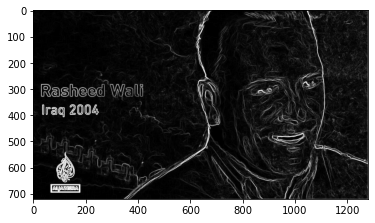

In [132]:
img = cv2.cvtColor(cv2.imread("frame427.jpg"), cv2.COLOR_BGR2GRAY)
img = textdetect.sobelOperator(img)
img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.imshow(img)
plt.show()

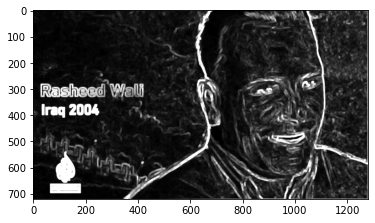

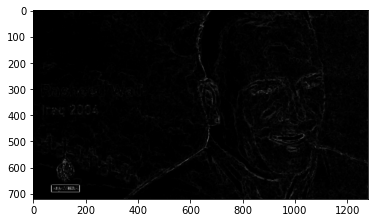

In [134]:
textdetect.morphologicalProcessing(img,'d') #dilation
textdetect.morphologicalProcessing(img,'e') #erosion